## EDA For Financial Stock Market

In [ ]:


# Install required libraries (run this in a terminal or as a cell if needed)
# !pip install pandas numpy matplotlib seaborn nltk scikit-learn

# Import necessary libraries

# Import libraries
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Add the parent directory (benin_eda_project/) to the Python path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)






## 
from src.data_loader import load_data
from src.data_analyzer import get_summary_statistics  #,convert_timestamp


# Debug: Print current working directory and Python path
print('Current working directory:', os.getcwd())
print('Python path:', sys.path)

Current working directory: e:\KAIM\KAIM-week1\notebooks
Python path: ['C:\\Users\\Naod.Amare\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'C:\\Users\\Naod.Amare\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', 'C:\\Users\\Naod.Amare\\AppData\\Local\\Programs\\Python\\Python313\\Lib', 'C:\\Users\\Naod.Amare\\AppData\\Local\\Programs\\Python\\Python313', 'e:\\KAIM\\KAIM-week1\\venv', '', 'e:\\KAIM\\KAIM-week1\\venv\\Lib\\site-packages', 'e:\\KAIM\\KAIM-week1\\venv\\Lib\\site-packages\\win32', 'e:\\KAIM\\KAIM-week1\\venv\\Lib\\site-packages\\win32\\lib', 'e:\\KAIM\\KAIM-week1\\venv\\Lib\\site-packages\\Pythonwin', 'e:\\KAIM\\KAIM-week1', 'e:\\KAIM\\KAIM-week1']


### Extract

In [15]:
# Load data
file_path = os.path.join('..', 'data', 'raw_analyst_ratings.csv')
df = load_data(file_path)
df.head()

2025-05-30 20:15:16,970 - INFO - Successfully loaded data from ..\data\raw_analyst_ratings.csv with 1407328 rows


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [16]:
# Summary statistics
print("Summary Statistics:")
stats = get_summary_statistics(df)
print(stats)

2025-05-30 20:15:21,278 - INFO - Computed summary statistics


Summary Statistics:
         Unnamed: 0
count  1.407328e+06
mean   7.072454e+05
std    4.081009e+05
min    0.000000e+00
25%    3.538128e+05
50%    7.072395e+05
75%    1.060710e+06
max    1.413848e+06


In [17]:
# Data type identification
print("\nData Type Identification:")
print(df.dtypes)


Data Type Identification:
Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object


In [18]:
#fix data type issue

df['date'] = pd.to_datetime(df['date'], format='ISO8601')

print("\nData Type Identification:")
print(df.dtypes)


Data Type Identification:
Unnamed: 0                        int64
headline                         object
url                              object
publisher                        object
date          datetime64[ns, UTC-04:00]
stock                            object
dtype: object


In [19]:
# 2. Count the number of articles per publisher (Top 10)
publisher_counts = df['publisher'].value_counts()
print("\nNumber of Articles per Publisher (Top 10):")
print(publisher_counts.head(10))


Number of Articles per Publisher (Top 10):
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


## Descriptive analysis

In [20]:
# 1. Headline Length Statistics
print("Headline Length Statistics:")
print(df['headline'].describe())

Headline Length Statistics:
count                     1407328
unique                     845770
top       Benzinga's Top Upgrades
freq                         5449
Name: headline, dtype: object


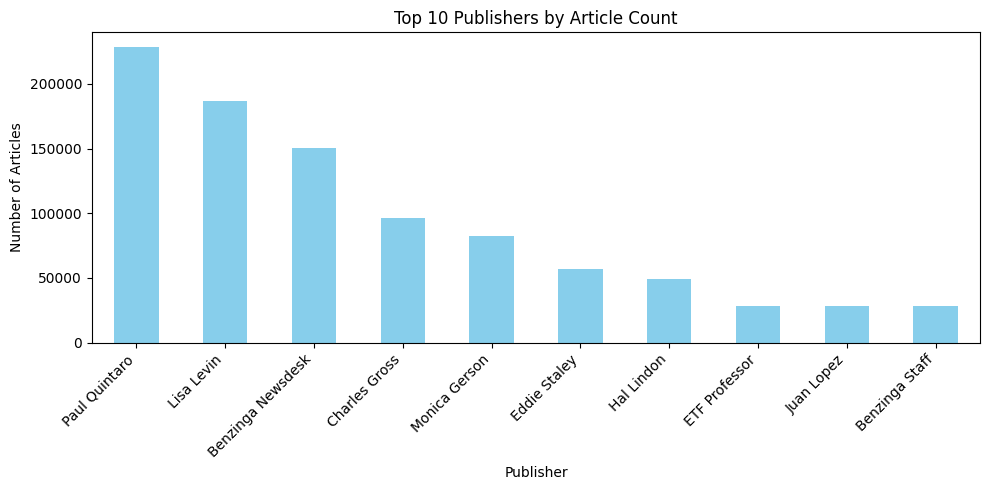

In [21]:
# Plot the top 10 publishers
plt.figure(figsize=(10, 5))
publisher_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

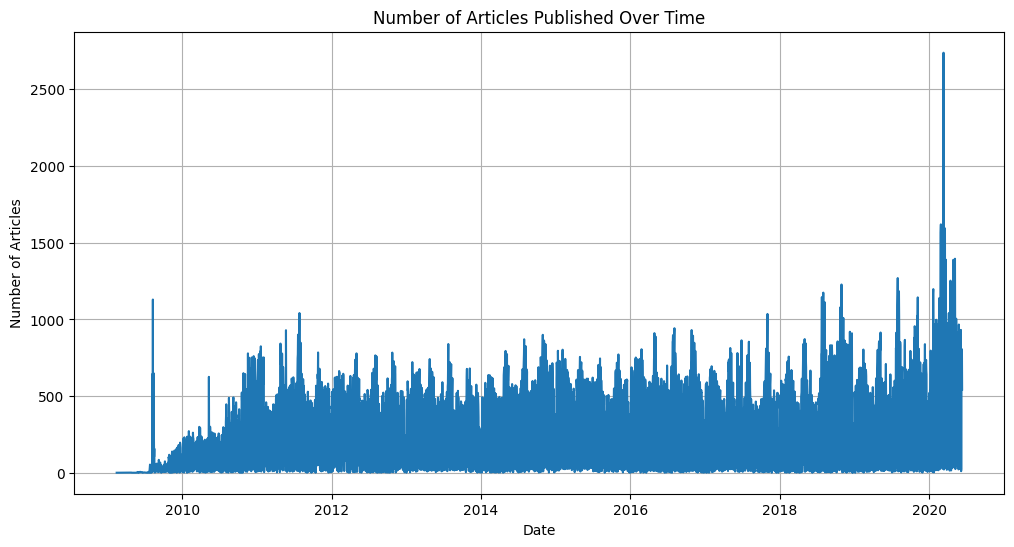

In [22]:
# 3. Analyze publication dates to see trends over time
df['date_only'] = df['date'].dt.date
daily_counts = df.groupby('date_only').size()
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid()
plt.show()

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Naod.Amare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Naod.Amare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Naod.Amare\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True


=== Text Analysis/Topic Modeling ===
Top 20 Keywords in Headlines:
['announces' 'benzinga' 'buy' 'company' 'downgrade' 'earnings' 'eps' 'est'
 'lower' 'market' 'price' 'pt' 'raise' 'report' 'sale' 'share' 'stock'
 'top' 'trading' 'update']


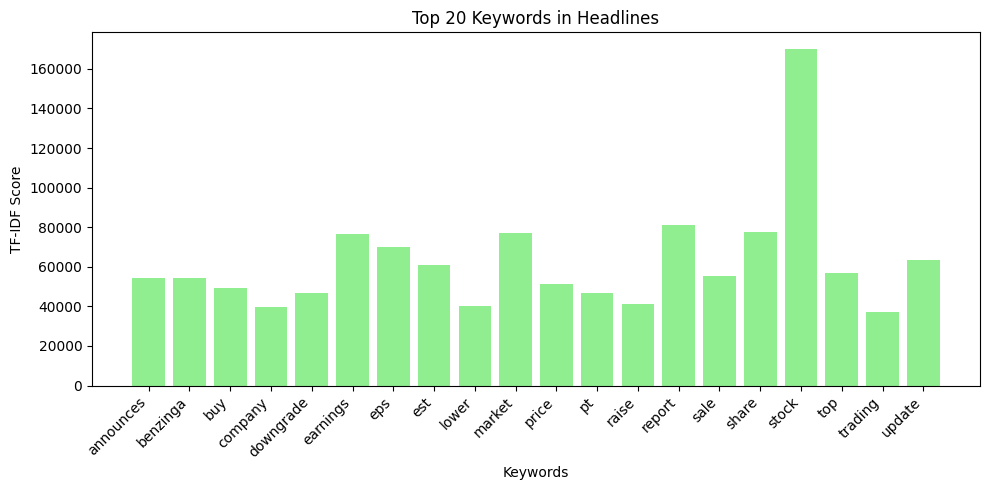

In [28]:
print("\n=== Text Analysis/Topic Modeling ===")

# Preprocess text for analysis
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

df['processed_headline'] = df['headline'].apply(preprocess_text)

# Use TF-IDF to find common keywords
tfidf = TfidfVectorizer(max_features=20)
tfidf_matrix = tfidf.fit_transform(df['processed_headline'])
keywords = tfidf.get_feature_names_out()
print("Top 20 Keywords in Headlines:")
print(keywords)

# Plot the top keywords
plt.figure(figsize=(10, 5))
plt.bar(keywords, tfidf_matrix.toarray().sum(axis=0), color='lightgreen')
plt.title('Top 20 Keywords in Headlines')
plt.xlabel('Keywords')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


=== Publisher Analysis ===

Top 5 Keywords for Paul Quintaro:
[('v', 75055), ('est', 69701), ('report', 58688), ('eps', 57004), ('sale', 33180)]

Top 5 Keywords for Lisa Levin:
[('stock', 72715), ('market', 41074), ('top', 32811), ('moving', 32324), ('session', 32324)]

Top 5 Keywords for Benzinga Newsdesk:
[('share', 44731), ('trading', 38834), ('company', 33229), ('stock', 33157), ('estimate', 31112)]

Top 5 Keywords for Charles Gross:
[('v', 16665), ('option', 15869), ('alert', 15676), ('call', 12953), ('ask', 12076)]

Top 5 Keywords for Monica Gerson:
[('stock', 30592), ('top', 28358), ('earnings', 19526), ('scheduled', 16625), ('industry', 13853)]

Domain Counts (if publishers are emails):
domain
N/A                   1399240
benzinga                 7937
gmail                     139
andyswan                    5
investdiva                  2
tothetick                   2
eosdetroit                  1
forextraininggroup          1
stockmetrix                 1
Name: count, dtype

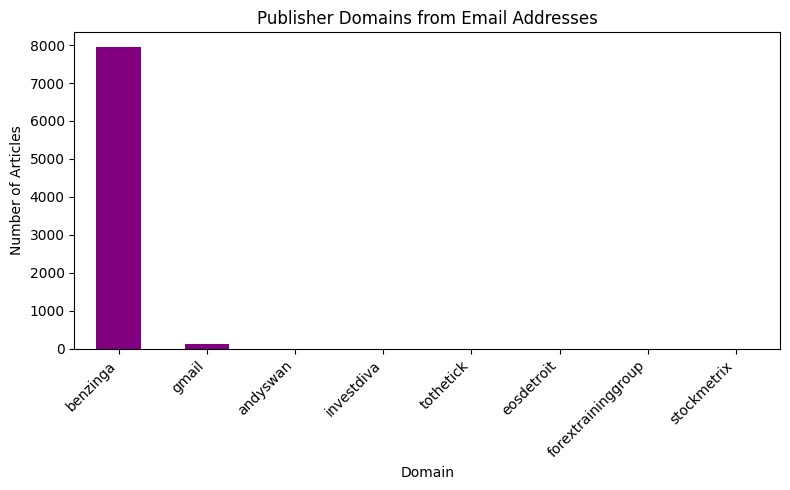

In [29]:
print("\n=== Publisher Analysis ===")
# 2. Differences in news type (keyword analysis per publisher)
top_publishers = publisher_counts.head(5).index
for publisher in top_publishers:
    publisher_headlines = df[df['publisher'] == publisher]['processed_headline']
    all_words = ' '.join(publisher_headlines).split()
    word_counts = Counter(all_words)
    print(f"\nTop 5 Keywords for {publisher}:")
    print(word_counts.most_common(5))

# 3. Extract domains if publishers are email addresses
df['domain'] = df['publisher'].apply(lambda x: x.split('@')[1].split('.')[0] if isinstance(x, str) and '@' in x else 'N/A')
domain_counts = df['domain'].value_counts()
print("\nDomain Counts (if publishers are emails):")
print(domain_counts.head(10))

# Plot domain counts (excluding 'N/A')
domain_counts = domain_counts[domain_counts.index != 'N/A']
if not domain_counts.empty:
    plt.figure(figsize=(8, 5))
    domain_counts.plot(kind='bar', color='purple')
    plt.title('Publisher Domains from Email Addresses')
    plt.xlabel('Domain')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No email-based publishers found.")